## Euler-Maruyama method - Numerical implementation

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fast')

### Question a):
In this question, I choose the values of the parameters arbitrarily, since we aren't provided any concrete values.

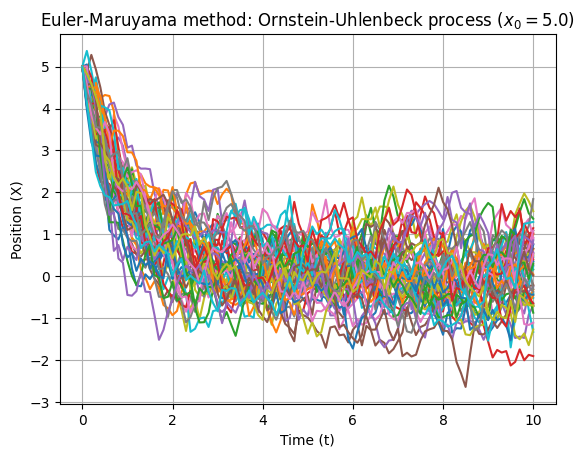

In [38]:
x0     = 5      # Initial position
T      = 10
tSteps = 100    # Number of time-steps
dt     = T/tSteps
Tau    = 1
c      = 1
Trajs  = []
M      = 50     # Number of trajectories

for m in range(M):
    xVec   = [x0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps) # Wiener process: Mean = 0; Std_Dev = Sqrt(Var) = Sqrt(dt).
    for i in range(tSteps):
        xVec.append(xVec[i] - 1/Tau * xVec[i] * dt + np.sqrt(c) * dW[i])
    Trajs.append(xVec)
    del xVec

for i in range(M):
    plt.plot(np.linspace(0., T, tSteps + 1), Trajs[i]) # Have to add +1,
                                                       # due to the initial condition being included from the beginning.
plt.xlabel("Time (t)")
plt.ylabel("Position (X)")
plt.title(r"Euler-Maruyama method: Ornstein-Uhlenbeck process ($x_0 = 5.0$)")
plt.grid(True)
plt.show()

### Question b):
Limit of infinite $\tau$ $\to$ Wiener process!

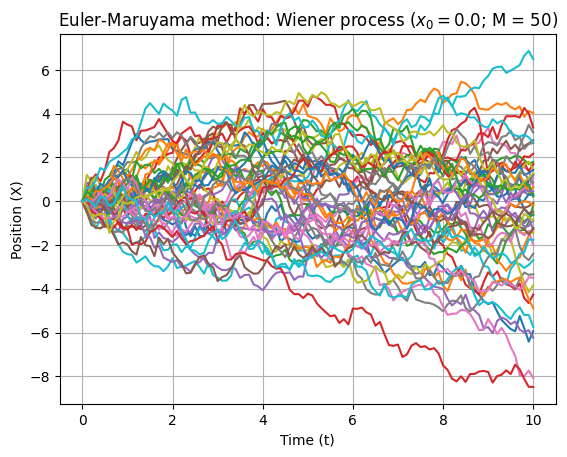

In [39]:
x0     = 0      # Initial position
T      = 10
tSteps = 100    # Number of time-steps
dt     = T/tSteps
c      = 1
Trajs  = []
M      = 50     # Number of trajectories

for m in range(M):
    xVec   = [x0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps)
    for i in range(tSteps):
        xVec.append(xVec[i] + np.sqrt(c) * dW[i])
    Trajs.append(xVec)
    del xVec

for i in range(M):
    plt.plot(np.linspace(0., T, tSteps + 1), Trajs[i]) # Have to add +1,
                                                       # due to the initial condition being included from the beginning.
plt.xlabel("Time (t)")
plt.ylabel("Position (X)")
plt.title(r"Euler-Maruyama method: Wiener process ($x_0 = 0.0$; M = 50)")
plt.grid(True)
plt.show()

### Question c):
Performing ensemble average of the results from b). Goal: obtain mean and variance of the distribution.

Note: I changed $M = 50$ to $M = 10$ $000$, for better results.

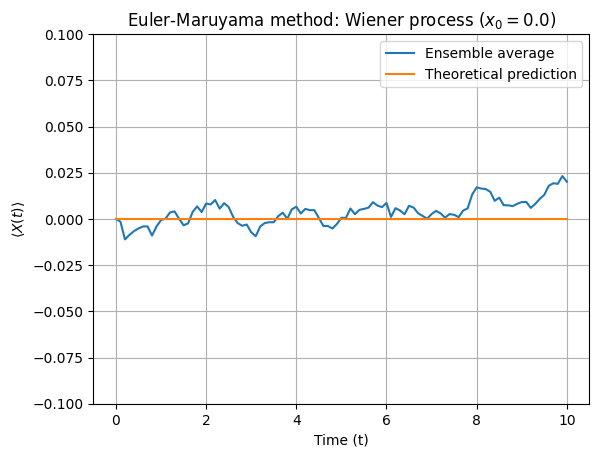

In [40]:
x0     = 0      # Initial position
T      = 10
tSteps = 100    # Number of time-steps
dt     = T/tSteps
c      = 1
Trajs  = []
M      = 10_000 # Number of trajectories

for m in range(M):
    xVec   = [x0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps)
    for i in range(tSteps):
        xVec.append(xVec[i] + np.sqrt(c) * dW[i])
    Trajs.append(xVec)
    del xVec

Ensemble_Avg = []
Ensemble_Var = []
for j in range(tSteps + 1):
        Ensemble_Avg.append(sum([Trajs[i][j] for i in range(M)])/M)
for j in range(tSteps + 1):
        Ensemble_Var.append(sum([(Trajs[i][j] - Ensemble_Avg[j])**2  for i in range(M)])/M)

plt.plot(np.linspace(0., T, tSteps + 1), Ensemble_Avg, label = "Ensemble average")
plt.plot(np.linspace(0., T, tSteps + 1), [x0 for i in range(tSteps + 1)], label = "Theoretical prediction")

plt.xlabel("Time (t)")
plt.ylabel(r"$\left\langleX(t)\right\rangle$")
plt.ylim(-0.1, 0.1)
plt.title(r"Euler-Maruyama method: Wiener process ($x_0 = 0.0$)")
plt.grid(True)
plt.legend()
plt.show()

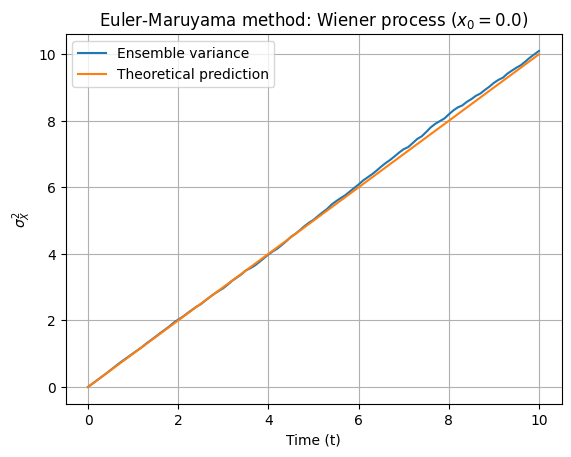

In [41]:
plt.plot(np.linspace(0., T, tSteps + 1), Ensemble_Var, label = "Ensemble variance") 
plt.plot(np.linspace(0., T, tSteps + 1), [c*i*dt for i in range(tSteps + 1)], label = "Theoretical prediction") 

plt.xlabel("Time (t)")
plt.ylabel(r"$\sigma_X^2$")
plt.title(r"Euler-Maruyama method: Wiener process ($x_0 = 0.0$)")
plt.grid(True)
plt.legend()
plt.show()

The results are what was expected for diffusion, as we've seen many times before.

Theoretical predictions: $\mu = x_0 = 0$ and $\sigma_x^2 = ct$.

### Question d):
Again, I use a large $M$, so as to get better ensamble averages.

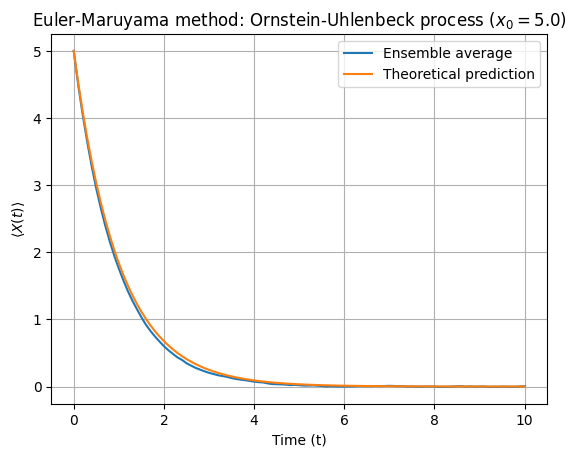

In [42]:
x0     = 5      # Initial position
T      = 10
tSteps = 100    # Number of time-steps
dt     = T/tSteps
Tau    = 1
c      = 1
Trajs  = []
M      = 10_000 # Number of trajectories

for m in range(M):
    xVec   = [x0]
    dW     = np.random.normal(0., np.sqrt(dt), size = tSteps)
    for i in range(tSteps):
        xVec.append(xVec[i] - 1/Tau * xVec[i] * dt + np.sqrt(c) * dW[i])
    Trajs.append(xVec)
    del xVec

Ensemble_Avg = []
Ensemble_Var = []
for j in range(tSteps + 1):
        Ensemble_Avg.append(sum([Trajs[i][j] for i in range(M)])/M)
for j in range(tSteps + 1):
        Ensemble_Var.append(sum([(Trajs[i][j] - Ensemble_Avg[j])**2  for i in range(M)])/M)

plt.plot(np.linspace(0., T, tSteps + 1), Ensemble_Avg, label = "Ensemble average")
plt.plot(np.linspace(0., T, tSteps + 1), x0 * np.exp(-1./Tau * np.linspace(0., T, tSteps + 1)), label = "Theoretical prediction")

plt.xlabel("Time (t)")
plt.ylabel(r"$\left\langleX(t)\right\rangle$")
plt.title(r"Euler-Maruyama method: Ornstein-Uhlenbeck process ($x_0 = 5.0$)")
plt.grid(True)
plt.legend()
plt.show()

In [43]:
print("Comparison for two time-instants:")
print(f"t = {np.linspace(0., T, tSteps + 1)[10]}: Ensamble Avg. = {Ensemble_Avg[10]:.4f}; Exact theoretical result = {x0 * np.exp(-1./Tau * np.linspace(0., T, tSteps + 1))[10]:.4f}.")
print(f"t = {np.linspace(0., T, tSteps + 1)[50]}: Ensamble Avg. = {Ensemble_Avg[50]:.4f}; Exact theoretical result = {x0 * np.exp(-1./Tau * np.linspace(0., T, tSteps + 1))[50]:.4f}.")

Comparison for two time-instants:
t = 1.0: Ensamble Avg. = 1.7593; Exact theoretical result = 1.8394.
t = 5.0: Ensamble Avg. = 0.0203; Exact theoretical result = 0.0337.


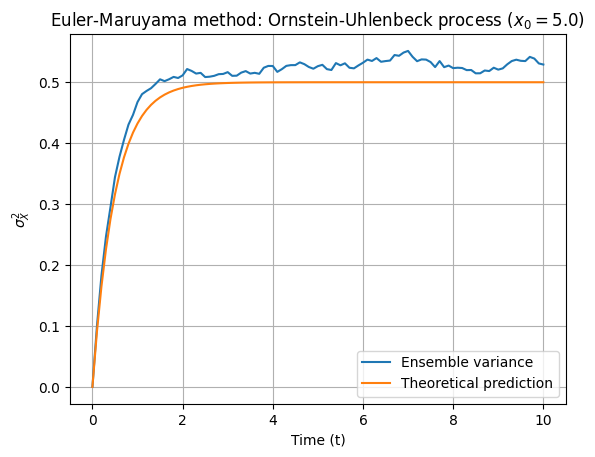

In [44]:
plt.plot(np.linspace(0., T, tSteps + 1), Ensemble_Var, label = "Ensemble variance") 
plt.plot(np.linspace(0., T, tSteps + 1), (c*Tau/2.) * (1. - np.exp(-2. * (1./Tau) * np.linspace(0., T, tSteps + 1))), label = "Theoretical prediction") 

plt.xlabel("Time (t)")
plt.ylabel(r"$\sigma_X^2$")
plt.title(r"Euler-Maruyama method: Ornstein-Uhlenbeck process ($x_0 = 5.0$)")
plt.grid(True)
plt.legend()
plt.show()

In [45]:
print("Comparison for two time-instants:")
print(f"t = {np.linspace(0., T, tSteps + 1)[10]}: Ensamble Var. = {Ensemble_Var[10]:.4f}; Exact theoretical result = {(c*Tau/2.) * (1. - np.exp(-2. * (1./Tau) * np.linspace(0., T, tSteps + 1)))[10]:.4f}.")
print(f"t = {np.linspace(0., T, tSteps + 1)[50]}: Ensamble Var. = {Ensemble_Var[50]:.4f}; Exact theoretical result = {(c*Tau/2.) * (1. - np.exp(-2. * (1./Tau) * np.linspace(0., T, tSteps + 1)))[50]:.4f}.")

Comparison for two time-instants:
t = 1.0: Ensamble Var. = 0.4675; Exact theoretical result = 0.4323.
t = 5.0: Ensamble Var. = 0.5264; Exact theoretical result = 0.5000.


The results seem to match the theoretical predictions reasonably well.